In [1]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Загружаем данные

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
batch_size = 128 # Размер мини-выборки
classes = 10 # Количество классов изображений
epochs = 25 # Количество эпох для обучения
img_rows, img_cols = 32, 32 # Размер изображений
img_channels = 3 # Количество каналов в изображении: RGB

In [4]:
# Нормализуем данные
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
# Преобразуем метки в категории
y_train = np_utils.to_categorical(y_train, classes)
y_test = np_utils.to_categorical(y_test, classes)

### Создаём модель

In [6]:
# Создаем последовательную модель
model = Sequential()

In [7]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(classes, activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
# Компилируем модель
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [9]:
# Структура сети
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

### Обучаем модель

In [10]:
# Обучаем модель
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, shuffle=True, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 45000 samples, validate on 5000 samples
Epoch 1/25





 - 25s - loss: 1.6632 - acc: 0.3885 - val_loss: 1.3201 - val_acc: 0.5242
Epoch 2/25
 - 19s - loss: 1.2604 - acc: 0.5474 - val_loss: 1.0648 - val_acc: 0.6190
Epoch 3/25
 - 19s - loss: 1.0887 - acc: 0.6116 - val_loss: 0.9408 - val_acc: 0.6704
Epoch 4/25
 - 19s - loss: 0.9622 - acc: 0.6604 - val_loss: 0.8255 - val_acc: 0.7198
Epoch 5/25
 - 19s - loss: 0.8630 - acc: 0.6958 - val_loss: 0.7397 - val_acc: 0.7368
Epoch 6/25
 - 19s - loss: 0.8030 - acc: 0.7200 - val_loss: 0.7073 - val_acc: 0.7584
Epoch 7/25
 - 19s - loss: 0.7417 - acc: 0.7388 - val_loss: 0.6825 - val_acc: 0.7688
Epoch 8/25
 - 19s - loss: 0.7022 - acc: 0.7516 - val_loss: 0.6571 - val_acc: 0.7714
Epoch 9/25
 - 19s - loss: 0.6602 - acc: 0.7666 - val_loss: 0.6735 - val_acc: 0.7682
Epoch 10/25
 - 19s - loss: 0.6244 - acc: 0.7784 - val_loss: 0.6477 - val_acc: 0.7768
Epoch 11

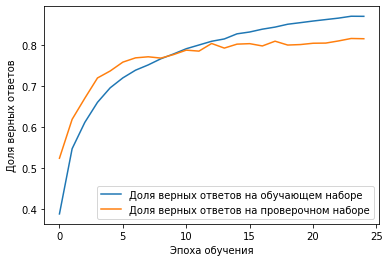

In [11]:
plt.plot(history.history['acc'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### Запускаем на тестовых данных

In [12]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(x_test, y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 79.63%
